In [1]:
import random
import typing as t
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
def seed_everything(seed: int):
    random.seed(seed)
    np.random.seed(seed)

seed_everything(42)

In [3]:
DATASET_DIR = Path('/home/jovyan/jigsaw-toxic/data/datasets/ccc-2017-bincls')
COMBINED_DIR = Path('/home/jovyan/jigsaw-toxic/data/datasets/combined')

CLS_LIST = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [19]:
!mkdir -p $DATASET_DIR
!cp $COMBINED_DIR/train_comment_classification_challenge_2017_no_leak.csv $DATASET_DIR/train_all.csv
!cp $COMBINED_DIR/valid.csv $DATASET_DIR/valid.csv

In [21]:
train_df = pd.read_csv(DATASET_DIR / 'train_all.csv')
valid_df = pd.read_csv(DATASET_DIR / 'valid.csv')

In [22]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,score
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
151937,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0.0
151938,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0.0
151939,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0.0
151940,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0.0


Toxic samples:     12035
Non-toxic sample:  139907


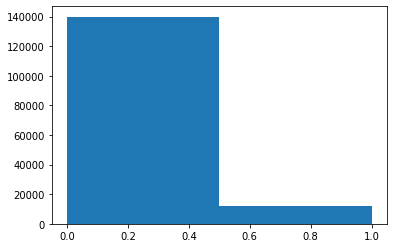

In [23]:
print('Toxic samples:    ', len(train_df[train_df['toxic'] == 1]))
print('Non-toxic sample: ', len(train_df[train_df['toxic'] == 0]))
plt.hist((train_df['toxic'] == 1).to_numpy().astype(np.int32), bins=2);